<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Байес" data-toc-modified-id="Байес-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Байес</a></span></li><li><span><a href="#Лаплас" data-toc-modified-id="Лаплас-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Лаплас</a></span></li><li><span><a href="#Вальд" data-toc-modified-id="Вальд-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вальд</a></span></li><li><span><a href="#Севидж" data-toc-modified-id="Севидж-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Севидж</a></span></li><li><span><a href="#Гурвиц" data-toc-modified-id="Гурвиц-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Гурвиц</a></span></li><li><span><a href="#Результат" data-toc-modified-id="Результат-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Результат</a></span></li></ul></div>

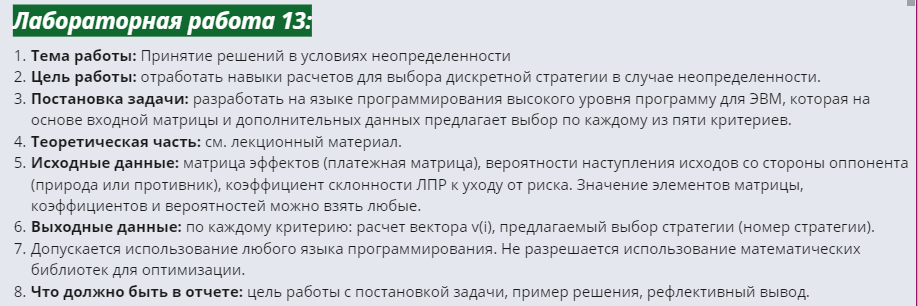

In [1]:
import numpy as np

In [12]:
input_matrix = [
    [33,10,20,26.5],
    [50,67,11.5,25],
    [23.5,35,40,58.5]
]

probas = [0.3, 0.2, 0.4, 0.1]
alf = 0.5

## Байес

Максимизируем средний выигрыш или минимизируем средний риск.

In [3]:
def bayes(input_matrix, probas):
    input_matrix_np = np.array(input_matrix)
    probas_np = np.array(probas)

    # Перемножение каждого списка матрицы на вероятности
    output_matrix = input_matrix_np * probas_np[:, np.newaxis].T
    output_vector = [sum(x) for x in output_matrix]
    print(f'Вектор v по критерию Байеса: {output_vector}')
    print(f'Лучшая стратегия по критерию Байеса: {np.argmax(output_vector)+1}')
    return np.argmax(output_vector)+1

## Лаплас

Все вероятности принимаем одинаковыми.

In [4]:
def laplace(input_matrix):
    input_matrix_np = np.array(input_matrix)
    probas_np = np.array([1/len(input_matrix[0])] * len(input_matrix[0]))

    # Перемножение каждого списка матрицы на вероятности
    output_matrix = input_matrix_np * probas_np[:, np.newaxis].T
    output_vector = [sum(x) for x in output_matrix]
    print(f'Вектор v по критерию Лапласа: {output_vector}')
    print(f'Лучшая стратегия по критерию Лапласа: {np.argmax(output_vector)+1}')
    return np.argmax(output_vector)+1

## Вальд

Оптимальная стратегия гарантирует максимальный выигрыш в худших условиях.

In [5]:
def vald(input_matrix):
    # Найдем меньшие доходности для каждой акции
    output_vector = [min(x) for x in input_matrix]
    print(f'Вектор v по критерию Вальда: {output_vector}')
    print(f'Лучшая стратегия по критерию Вальда: {np.argmax(output_vector)+1}')
    return np.argmax(output_vector)+1

## Севидж

Оптимальная стратегия - та, при которой величина максимального риска минимизируется в худших условиях.

Риск – мера несоответствия между разными возможными результатами принятия определенных стратегий

In [6]:
def sadvig(input_matrix):
    input_matrix_np = np.array(input_matrix)
    max_values = input_matrix_np.max(axis=0)
    output_vector = [-max(x) for x in max_values - input_matrix_np]
    print(f'Вектор v по критерию Севиджа: {output_vector}')
    print(f'Лучшая стратегия по критерию Севиджа: {np.argmax(output_vector)+1}')
    return np.argmax(output_vector)+1

## Гурвиц

Является критерием пессимизма-оптимизма, регулируется дополнительным параметром

In [7]:
def gurviz(input_matrix, alf):
    output_vector = [alf*min(x)+(1-alf)*max(x) for x in input_matrix]
    print(f'Вектор v по критерию Гурвица: {output_vector}')
    print(f'Лучшая стратегия по критерию Гурвица: {np.argmax(output_vector)+1}')
    return np.argmax(output_vector)+1

## Результат

In [10]:
def find_best_strategy(input_matrix, probas, alf):
    strategies = []
    strategies.append(bayes(input_matrix, probas))
    strategies.append(laplace(input_matrix))
    strategies.append(vald(input_matrix))
    strategies.append(sadvig(input_matrix))
    strategies.append(gurviz(input_matrix, alf))
    print('_______________________________________________________________')
    print(f'Лучшая стратегия: {max(set(strategies), key=strategies.count)}')

In [11]:
find_best_strategy(input_matrix, probas, alf)

Вектор v по критерию Байеса: [22.549999999999997, 35.5, 35.9]
Лучшая стратегия по критерию Байеса: 3
Вектор v по критерию Лапласа: [22.375, 38.375, 39.25]
Лучшая стратегия по критерию Лапласа: 3
Вектор v по критерию Вальда: [10, 11.5, 23.5]
Лучшая стратегия по критерию Вальда: 3
Вектор v по критерию Севиджа: [-57.0, -33.5, -32.0]
Лучшая стратегия по критерию Севиджа: 3
Вектор v по критерию Гурвица: [21.5, 39.25, 41.0]
Лучшая стратегия по критерию Гурвица: 3
_______________________________________________________________
Лучшая стратегия: 3
